In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)

In [17]:
train_raw_data = pd.read_csv('train.csv')
test_raw_data = pd.read_csv('test.csv')
train = train_raw_data.drop(columns = 'Id')
test = test_raw_data.drop(columns = 'Id')
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [19]:
train.describe(include='O').T

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [167]:
train = train_raw_data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [168]:
na_list = train.isna().sum()[(train.isna().sum() > 0)].sort_values(ascending=False)
na_list

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

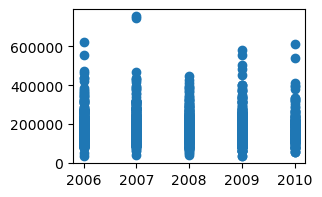

In [169]:
plt.figure(figsize=(3,2))
plt.scatter(train.YrSold, train.SalePrice)
plt.show()

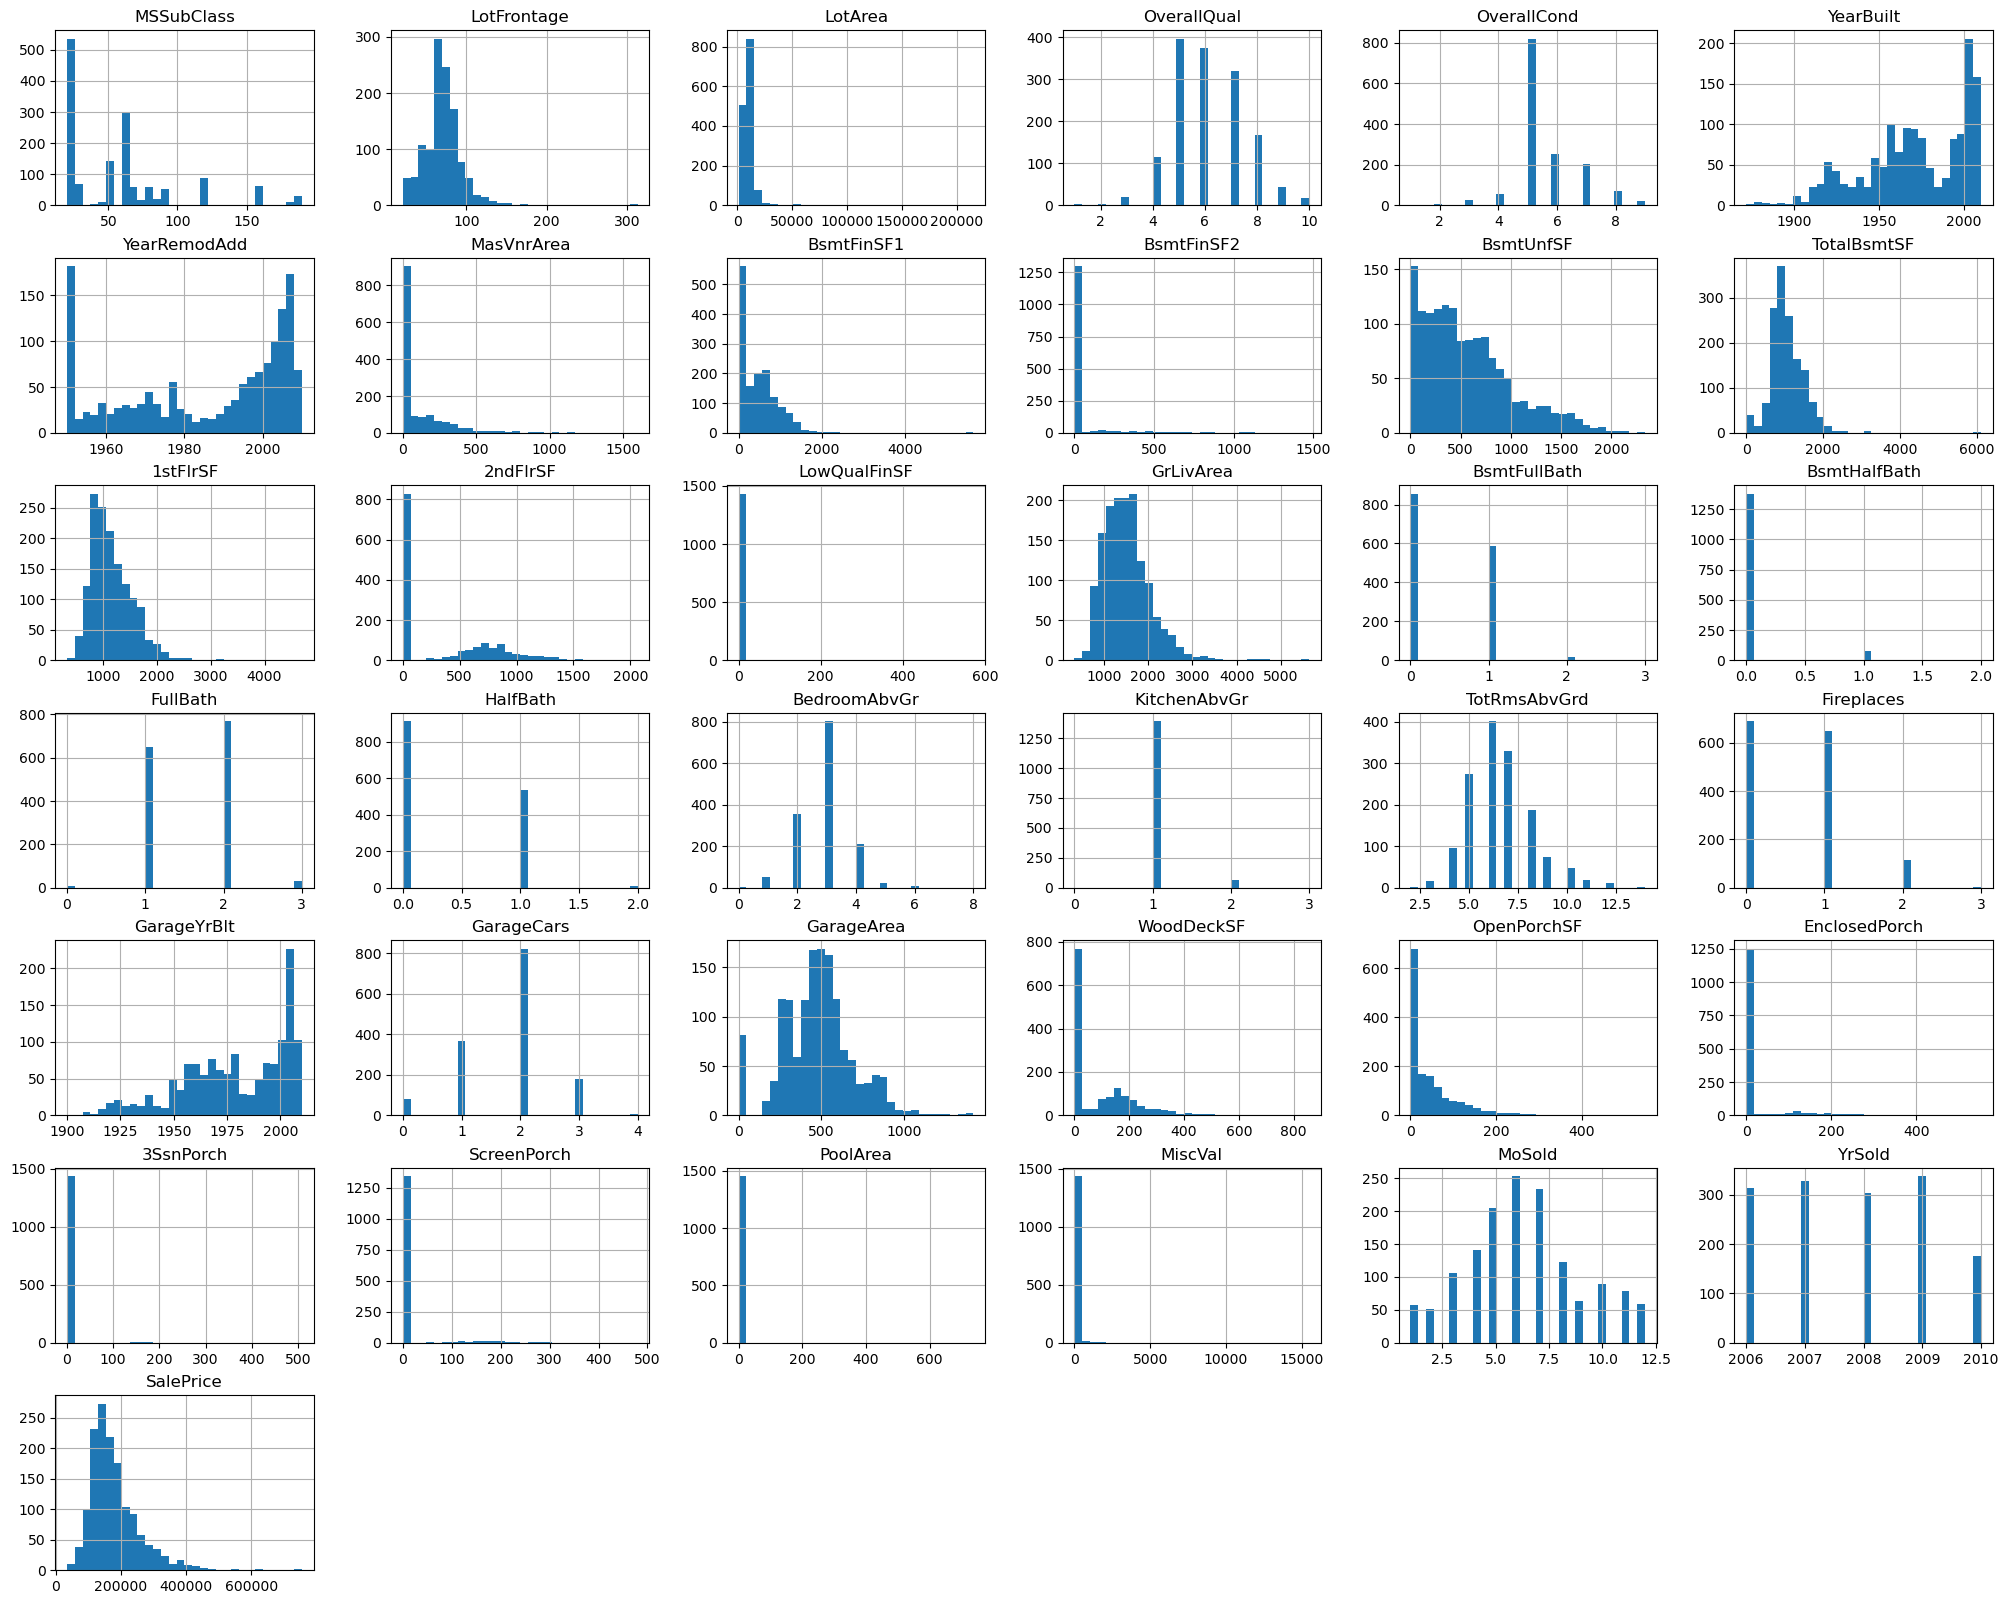

In [20]:
train.hist(bins = 30, figsize=(25, 20))
plt.show()

YearRemodAdd - what happened in 1950?
In 2010 data till August, not the whole year
how far from the university?
fetures like 2ndFlrSF
почему такие просадки в годах постройки?

In [22]:
train[train.YrSold == 2010].MoSold.max()

7

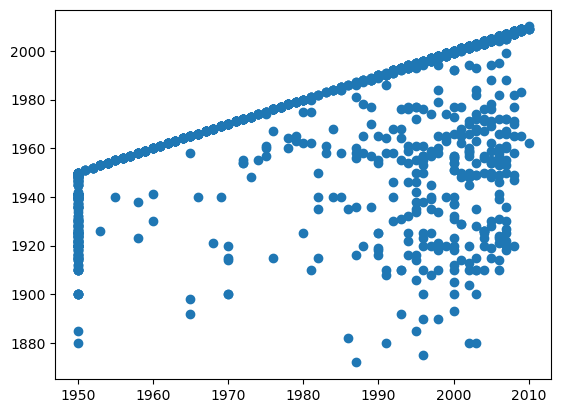

In [23]:
plt.scatter(train.YearRemodAdd, train.YearBuilt)

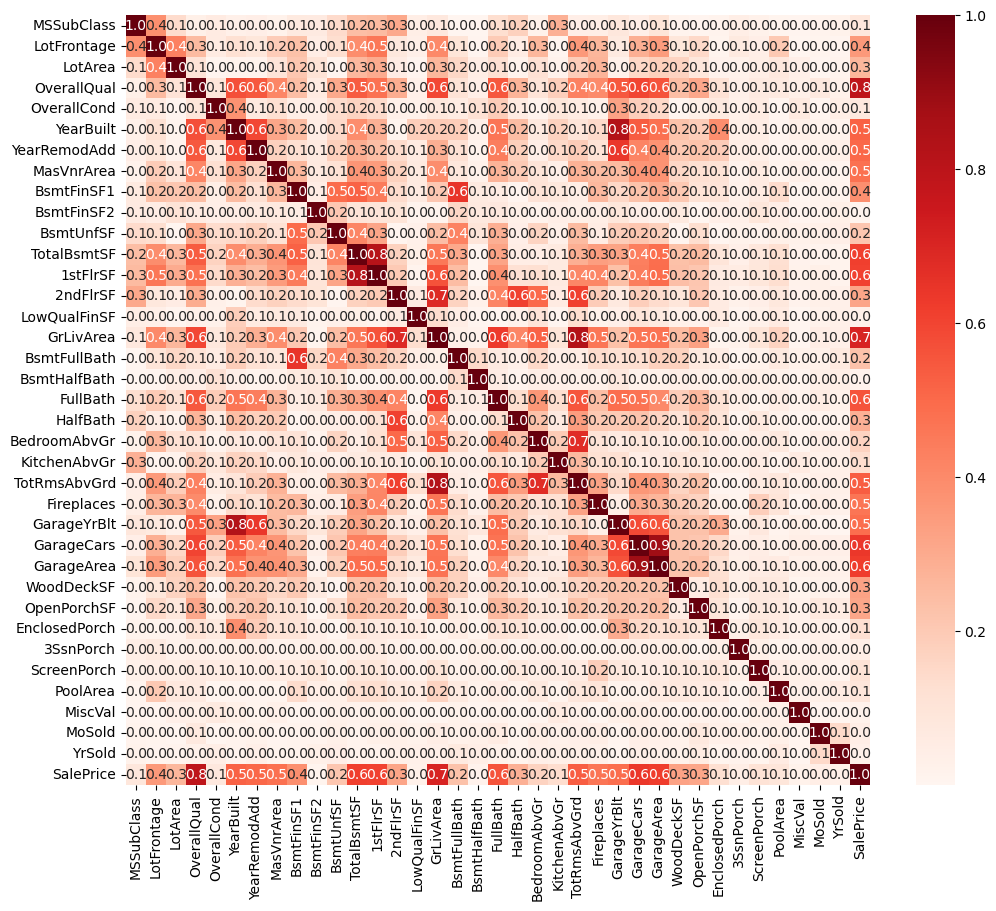

In [24]:
plt.figure(figsize=(12,10))
cor = train.corr()
cor = abs(cor)
sns.heatmap(cor, annot=True, fmt=".1f", cmap=plt.cm.Reds)
plt.show()

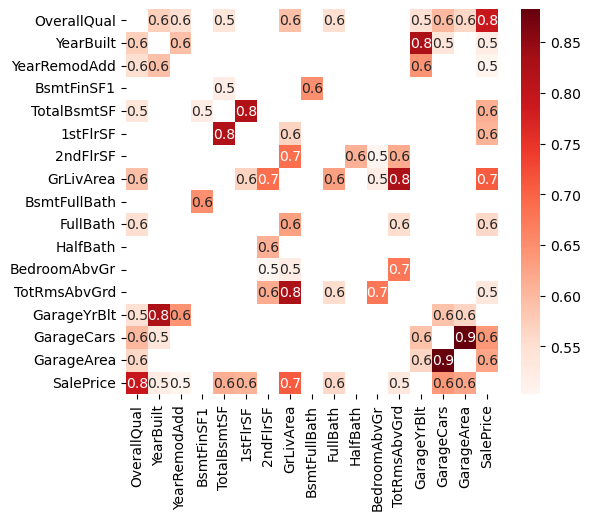

In [32]:
plt.figure(figsize=(6,5))
cor[cor == 1] = 0
cor = cor[cor>0.5]
cor2 = cor.dropna(how='all')
cor2 = cor2.dropna(axis = 1, how='all')
sns.heatmap(cor2, annot=True, fmt=".1f", cmap=plt.cm.Reds)
plt.show()

We have to take into consideration that there are strongly correlated features:
YearBuilt and GatageYrBlt
1stFlrSF and TotalBsmtSF
TotRmsAbvGrd and GrLivArea

In [33]:
cor2.loc['SalePrice'].dropna()

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64

Conclusions.
There are some strongly correlated features

Strongly correlated Features:
    GarageYrBlt vs YearBuilt (corr = 0.8)
    GrLivArea vs TotRmsAbvGrd (corr = 0.8)
    
    
    

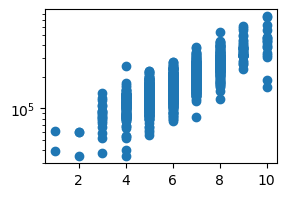

In [37]:
plt.figure(figsize=(3,2))
plt.scatter(train.OverallQual, train.SalePrice)
plt.yscale('log')
plt.show()

In [29]:
#train.query('LotArea < 10000 and OpenPorchSF < 40')

LINEAR REGRESSION

In [91]:
X = train[['OverallQual', 'GrLivArea']]
y = train['SalePrice']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X, y)

test = test[['OverallQual', 'GrLivArea']]
y_pred = lr_model.predict(test) 


In [92]:
y_pred.shape

(1459,)

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [7]:
X = train[['GarageArea', 'MSSubClass', 'LotArea', 'OverallQual', 
           'OverallCond', 'YearBuilt', 'YearRemodAdd']] 
           #'1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
           #'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           #'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
           #'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
           #'MoSold', 'MiscVal', 'YrSold'
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)
#train[['YrSold', 'SaleType']]

#y_pred = pd.DataFrame(y_pred)

#compare = pd.concat([y_pred, y_test], axis=1)#.dropna()
#compare[compare[0] == compare['SalePrice']]



0.01141552511415525

In [8]:
test_raw_data = pd.read_csv('test.csv')
# test_raw_data = test_raw_data.drop(columns = 'Id')
# y_pred2 = model.predict(test_raw_data)

In [9]:
#test_raw_data.info()#['SalePrice'] = y_pred

In [10]:
X = test_raw_data[['GarageArea', 'MSSubClass', 'LotArea', 'OverallQual', 
           'OverallCond', 'YearBuilt', 'YearRemodAdd']] 
X = X.fillna(X.mean())
y_pred2 = model.predict(X)
result = pd.concat([pd.Series(test_raw_data.Id), pd.Series(y_pred2)], axis=1)
result

,Id,0
0,1461,132500
1,1462,150000
2,1463,143000
3,1464,173000
4,1465,245500
...,...,...
1454,2915,81000
1455,2916,112000
1456,2917,215000
1457,2918,179000


In [221]:
result.to_csv('test_result.csv', index=False)

In [19]:
X = train[['GarageArea', 'MSSubClass', 'LotArea', 'OverallQual', 
           'OverallCond', 'YearBuilt', 'YearRemodAdd', 
           '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
           'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
           'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
           'MoSold', 'MiscVal', 'YrSold'
          ]]
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_pred, y_test)

0.00684931506849315

In [93]:
result = pd.concat([pd.Series(test_raw_data.Id), pd.Series(y_pred)], axis=1)
result.to_csv('test_result.csv', index=False)

In [94]:
result

,Id,0
0,1461,110205.121979
1,1462,167242.513238
2,1463,151152.133569
3,1464,182604.625362
4,1465,230203.359049
...,...,...
1454,2915,88305.070817
1455,2916,88305.070817
1456,2917,128527.932077
1457,2918,114338.926697
